In [1]:
import pandas as pd

In [2]:
# Load the actionshistory
data = pd.read_json('/eos/user/l/llayer/AIErrorHandling/actionshistory.json', orient='index')

# Reset index
data_index_reset = data.reset_index()
data_index_reset = data_index_reset.rename(columns={'index': 'task_name'})

In [3]:
data_index_reset.head()

,task_name,errors,parameters
0,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,"{u'good_sites': {}, u'bad_sites': {u'-1': {u'T...","{u'action': u'acdc', u'sites': [u'T1_US_FNAL']..."
1,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,"{u'good_sites': {}, u'bad_sites': {u'-1': {u'T...","{u'action': u'acdc', u'sites': [u'T1_US_FNAL']..."
2,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,"{u'good_sites': {}, u'bad_sites': {u'-1': {u'T...","{u'action': u'acdc', u'sites': [u'T1_US_FNAL']..."
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"{u'good_sites': {u'85': {u'T1_UK_RAL': 1}}, u'...","{u'action': u'acdc', u'cores': u'', u'xrootd':..."
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"{u'good_sites': {u'-1': {u'T2_DE_RWTH': 1, u'T...","{u'action': u'acdc', u'cores': u'', u'sites': ..."


In [106]:
def loop_over_sites(sites, task_name, ignore_neg_code):
    key = []
    for exit_code, site_dict in zip(sites.keys(), sites.values()):
        if ignore_neg_code == True:
            if int(exit_code) == -1:
                continue
        for site in site_dict:
            #if site == 'Unknown' or site == 'NoReportedSite':
            #    continue
            key.append((task_name, exit_code, site))
    return key
        

In [107]:
def map_to_key(row, ignore_neg_code):
    
    task_name = row['task_name']
    errors = row['errors']
    good_sites = errors['good_sites']
    bad_sites = errors['bad_sites']
    
    good_sites_key = loop_over_sites(good_sites, task_name, ignore_neg_code)
    bad_sites_key = loop_over_sites(bad_sites, task_name, ignore_neg_code)
    #return list(set(good_sites_key + bad_sites_key))
    if len(list(set(good_sites_key + bad_sites_key))) < len(good_sites_key + bad_sites_key):
        print
        print good_sites_key
        print bad_sites_key
        print
        
    return list(set(good_sites_key + bad_sites_key))

In [241]:
data_index_reset['non_zero_keys'] = data_index_reset.apply(lambda x: map_to_key(x, ignore_neg_code = True), axis = 1)
data_index_reset['all_keys'] = data_index_reset.apply(lambda x: map_to_key(x, ignore_neg_code = False), axis = 1)

In [234]:
data_index_reset['non_zero_keys'].head()

0                                                   []
1                                                   []
2                                                   []
3    [(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_1...
4    [(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_1...
Name: non_zero_keys, dtype: object

In [243]:
keys_non_zero = data_index_reset['non_zero_keys'].apply(pd.Series).unstack().reset_index(drop=True).dropna()
keys_all = data_index_reset['all_keys'].apply(pd.Series).unstack().reset_index(drop=True).dropna()

In [244]:
keys_non_zero = keys_non_zero.to_frame('key')
keys_all = keys_all.to_frame('key')

In [245]:
keys_non_zero.head()

,key
3,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
4,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
5,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
8,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
9,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...


In [239]:
def expand_key(key):
    return key[0], key[1], key[2]

In [257]:
keys_non_zero['task_name'], keys_non_zero['error'], keys_non_zero['site'] = zip(*keys_non_zero['key'].map(expand_key))

In [252]:
keys_all['task_name'], keys_all['error'], keys_all['site'] = zip(*keys_all['key'].map(expand_key))

In [246]:
keys_non_zero.head()

,key
3,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
4,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
5,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
8,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...
9,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...


In [286]:
counts = keys_non_zero['error'].value_counts().to_frame('counts')

In [287]:
counts.head(10)

,counts
92,19933
85,16854
99303,11578
50660,10883
50664,8526
71104,8387
139,5700
8001,4734
71305,4510
99109,3884


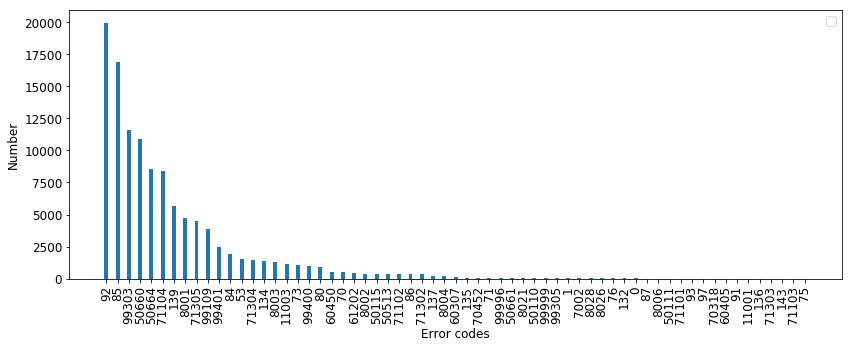

In [288]:
labels = counts.index
x = np.arange(len(labels))
y = counts.counts
width = 0.35  

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x, y, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Error codes')
ax.set_ylabel('Number')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
plt.xticks(x, labels, rotation='vertical')
ax.legend()

fig.tight_layout()

#plt.show()
plt.savefig('number_errors.png')

In [279]:
print counts.head()

       counts
92      19933
85      16854
99303   11578
50660   10883
50664    8526


In [289]:
most_frequent_errors = list(counts.index)

In [290]:
print most_frequent_errors

[u'92', u'85', u'99303', u'50660', u'50664', u'71104', u'139', u'8001', u'71305', u'99109', u'99401', u'84', u'53', u'71304', u'134', u'8003', u'11003', u'73', u'99400', u'80', u'60450', u'70', u'61202', u'8002', u'50115', u'50513', u'71102', u'86', u'71302', u'137', u'8004', u'60307', u'135', u'70452', u'71', u'99996', u'50661', u'8021', u'50110', u'99999', u'99305', u'1', u'7002', u'8028', u'8026', u'76', u'132', u'0', u'87', u'8006', u'50111', u'71101', u'93', u'97', u'70318', u'60405', u'91', u'11001', u'136', u'71303', u'143', u'71103', u'75']


## 2. Make summary statistics for the sites/errors

In [295]:
# Number of workflows 
print 'Number of workflows', len(data_index_reset)
print
# Number of workflows
print 'All (task_name, site, error) keys'
print 'Number of all unique keys:', len(keys_all)
print 'Number of all unique sites:', len(keys_all['site'].unique())
print 'Number of all unique errors:', len(keys_all['error'].unique())
print
print 'All (task_name, site, error) keys with error != -1'
print 'Number of all unique keys:', len(keys_non_zero)
print 'Number of all unique sites:', len(keys_non_zero['site'].unique())
print 'Number of all unique errors:', len(keys_non_zero['error'].unique())
print
print 'Most frequent error codes:'
print most_frequent_errors[0:6]

Number of workflows 25090

All (task_name, site, error) keys
Number of all unique keys: 545863
Number of all unique sites: 151
Number of all unique errors: 64

All (task_name, site, error) keys with error != -1
Number of all unique keys: 114134
Number of all unique sites: 79
Number of all unique errors: 63

Most frequent error codes:
[u'92', u'85', u'99303', u'50660', u'50664', u'71104']


## 3. Load the error messages written out with spark and join with the keys

In [127]:
df_msg = pd.read_csv('/eos/user/l/llayer/AIErrorHandling/df_error_msg_exitcodes.csv')

In [128]:
print len(df_msg['site'].unique()), len(df_msg['error'].unique())

75 55


In [129]:
df_msg.head()

,task_name,site,error,error_msg,side_state,action,memory
0,/fabozzi_Run2016D-07Aug17-v1-SingleElectron-17...,T1_US_FNAL_Disk,85,Adding last 25 lines of CMSSW stdout: 775 fi...,bad_site,acdc,NaN
1,/fabozzi_Run2017B-v1-DoubleMuon-09Oct2017_940p...,T1_RU_JINR,92,Adding last 25 lines of CMSSW stdout: %MSG-w X...,good_site,acdc,NaN
2,/fabozzi_Run2017F-v1-DoubleEG-17Nov2017_940_17...,T2_UK_London_Brunel,99109,Error in StageOut: 99109 <@========== WMExcept...,good_site,acdc,NaN
3,/fabozzi_Run2017F-v1-DoubleMuon-09May2018_947_...,T2_US_MIT,8004,An exception of category 'BadAlloc' occurred w...,good_site,acdc,180000.0
4,/fabozzi_Run2017H-v1-FSQJet2-17Nov2017_944_180...,T2_US_Nebraska,92,Adding last 25 lines of CMSSW stdout: [2018-04...,good_site,acdc,NaN


In [130]:
df_msg.error = df_msg.error.astype(int)

In [131]:
keys_non_zero.error = keys_non_zero.error.astype(int)

In [139]:
df = pd.merge(keys_non_zero , df_msg, on = ['task_name', 'site', 'error'], how='left')

In [140]:
len(df_msg)

94139

In [141]:
len(df)

114282

In [135]:
df.head()

,key,task_name,error,site,error_msg,side_state,action,memory
0,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,85,T1_UK_RAL,Adding last 25 lines of CMSSW stdout: - Min e...,good_site,acdc,NaN
1,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,Error in CMSSW step cmsRun1 Number of Cores: 1...,good_site,acdc,NaN
2,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,Error in CMSSW step cmsRun1 Number of Cores: 1...,good_site,acdc,NaN
3,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,99400,NoReportedSite,Could not find jobReport ========== condor.29...,bad_site,acdc,NaN
4,(/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_10...,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,Error in CMSSW step cmsRun1 Number of Cores: 1...,good_site,acdc,NaN


In [136]:
print len(df['site'].unique()), len(df['error'].unique())

75 55


In [215]:
def plot_found_messages(df_merged, col):
    
    df_has_msg = df_merged[df_merged['error_msg'].isna() == False]
    df_no_msg = df_merged[df_merged['error_msg'].isna() == True]

    frac = float(len(df_has_msg)) / float(len(df_merged))
    
    error_has_msg = df_has_msg['task_name'].groupby([df_has_msg[col]]).size().to_frame('has_msg')
    error_no_msg = df_no_msg['task_name'].groupby([df_no_msg[col]]).size().to_frame('no_msg')
    
    merged = pd.merge(error_has_msg , error_no_msg, on = [col], how='outer').fillna(0.).reset_index()
    
    def get_frac(row):
        
        has_msg = row['has_msg']
        no_msg = row['no_msg']
        return has_msg / float(has_msg + no_msg)
    
    merged['frac'] = merged.apply(lambda x: get_frac(x), axis=1)
    return merged, frac

In [219]:
error, frac = plot_found_messages(df, 'error')

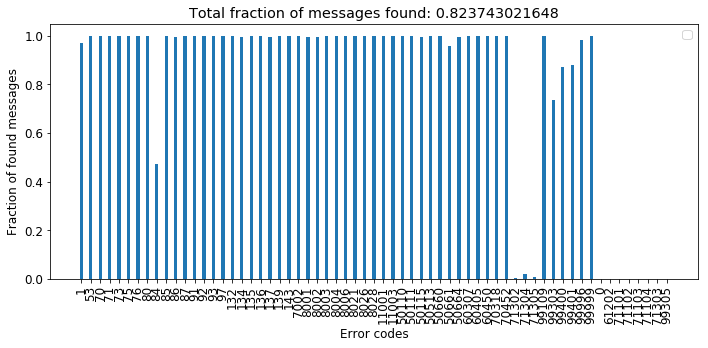

In [261]:
from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 12})

labels = error.error
x = np.arange(len(labels))
y = error.frac
width = 0.35  

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, y, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Error codes')
ax.set_ylabel('Fraction of found messages')
ax.set_title('Total fraction of messages found: ' + str(frac))
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
plt.xticks(x, labels, rotation='vertical')
ax.legend()

fig.tight_layout()

#plt.show()
plt.savefig('errors.png')

In [224]:
sites, frac = plot_found_messages(df, 'site')

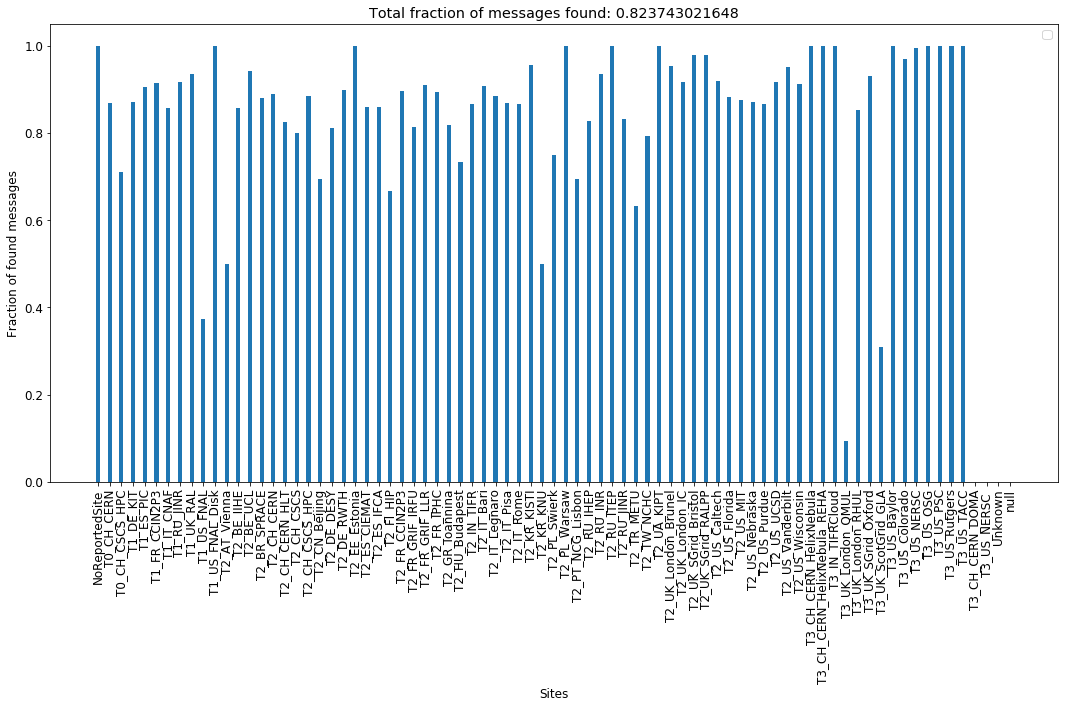

In [262]:
labels = sites.site
x = np.arange(len(labels))
y = sites.frac
width = 0.35  

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x, y, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sites')
ax.set_ylabel('Fraction of found messages')
ax.set_title('Total fraction of messages found: ' + str(frac))
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
plt.xticks(x, labels, rotation='vertical')
ax.legend()

fig.tight_layout()

#plt.show()
plt.savefig('sites.png')